# Downloading Data from Git

In [65]:
! curl -O https://raw.githubusercontent.com/gaylorav/NLPFinal/main/bg_descriptions.csv
! curl -O https://raw.githubusercontent.com/gaylorav/NLPFinal/main/bg_descriptions_v2.csv
! ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.1M  100 18.1M    0     0  57.0M      0 --:--:-- --:--:-- --:--:-- 56.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3230k  100 3230k    0     0  7474k      0 --:--:-- --:--:-- --:--:-- 7477k
bg_descriptions.csv	bg_word_counts.csv	bg_word_counts_pos.csv
bg_descriptions_v2.csv	bg_word_counts_neg.csv	sample_data


#Imports

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('popular')
nltk.download('punkt_tab')
import re
from nltk import ngrams
from collections import defaultdict
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

# Selecting Relevant Columns From CSV -> PD

In [67]:
descriptions_df = pd.read_csv("bg_descriptions.csv", encoding="utf-8")
descriptions_df['id'] = descriptions_df['id'].astype(int)
descriptions_df['usersrated'] = descriptions_df['usersrated'].astype(int)
descriptions_df['average'] = descriptions_df['average'].astype(float)
descriptions_df['sentiment'] = descriptions_df['sentiment'].astype(int)

print(len(descriptions_df))

sentiment_counts = descriptions_df['sentiment'].value_counts().sort_index()
print(sentiment_counts)

15589
sentiment
-1    3276
 0    3431
 1    8882
Name: count, dtype: int64


In [68]:
descriptions_df2 = pd.read_csv("bg_descriptions_v2.csv", encoding="utf-8")
descriptions_df2['id'] = descriptions_df2['id'].astype(int)
descriptions_df2['usersrated'] = descriptions_df2['usersrated'].astype(int)
descriptions_df2['average'] = descriptions_df2['average'].astype(float)
descriptions_df2['sentiment'] = descriptions_df2['sentiment'].astype(int)

print(len(descriptions_df2))

sentiment_counts2 = descriptions_df2['sentiment'].value_counts().sort_index()
print(sentiment_counts2)

2600
sentiment
0    1300
1    1300
Name: count, dtype: int64


# Analyzing Distribution of Board Game Ratings

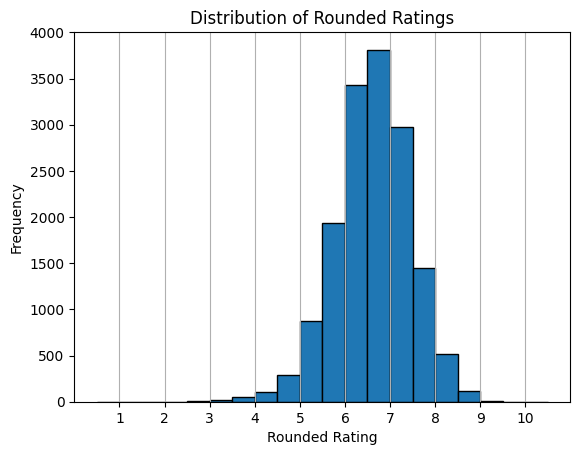

In [69]:
rounded_ratings = descriptions_df["average"]

# Plot the histogram
descriptions_df["average"].hist(bins=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5], edgecolor='black')
plt.xlabel("Rounded Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Rounded Ratings")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(axis='y')
plt.show()


In [70]:
stoplist = stopwords.words('english')
top_ten_common = set(["game", "players", "cards", "player", "one", "card", "play", "points", "new", "turn"])
stoplist = stoplist + list(string.punctuation) + ["'s", "n't"]
stoplist = set(stoplist)

pattern = re.compile(r'^[^A-Za-z0-9\s]+$')

word_lens = []
words = []

for d in descriptions_df["description"]:
  d = nltk.word_tokenize(d)
  word_lens.append(len(d))
  for word in d:
    word = word.lower()
    if word not in stoplist and not pattern.match(word):
      words.append(word)

pos_word_lens = []
neg_word_lens = []
pos_words = []
neg_words = []

for d, r in zip(descriptions_df2["description"], descriptions_df2["sentiment"]):
  d = nltk.word_tokenize(d)
  if r == 1:
    pos_word_lens.append(len(d))
    for word in d:
      word = word.lower()
      if word not in stoplist and not pattern.match(word) and word not in top_ten_common:
        pos_words.append(word)
  else:
    neg_word_lens.append(len(d))
    for word in d:
      word = word.lower()
      if word not in stoplist and not pattern.match(word) and word not in top_ten_common:
        neg_words.append(word)

In [71]:
print(descriptions_df["usersrated"].median())
print(descriptions_df["usersrated"].mean())
print(f"average word count 3 class: {sum(word_lens) / len(word_lens)}")
print(f"positive word count (binary df): {sum(pos_word_lens) / len(pos_word_lens)}")
print(f"negative word count (binary df): {sum(neg_word_lens) / len(neg_word_lens)}")

337.0
1635.871896850343
average word count 3 class: 229.9239207133235
positive word count (binary df): 301.1223076923077
negative word count (binary df): 171.78307692307692


In [72]:
df_words = pd.Series(words).value_counts().reset_index()
df_words_pos = pd.Series(pos_words).value_counts().reset_index()
df_words_neg = pd.Series(neg_words).value_counts().reset_index()
df_words.columns = ['word', 'frequency']
df_words_pos.columns = ['word', 'frequency']
df_words_neg.columns = ['word', 'frequency']

df_words.to_csv('bg_word_counts.csv', index=False)
df_words_pos.to_csv('bg_word_counts_pos.csv', index=False)
df_words_neg.to_csv('bg_word_counts_neg.csv', index=False)